In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [19]:
from ucimlrepo import fetch_ucirepo 
  
covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets - 1


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std

In [22]:
num_classes = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

In [23]:
batch_size = 128
X_batch, y_batch = X_train[:batch_size], y_train[:batch_size]

def residual_block(inputs, units):
    x = layers.Dense(units, activation='relu')(inputs)
    x = layers.Dense(units, activation='relu')(x)
    
    # linear projection to match dimensions
    if inputs.shape[-1] != units:
        inputs = layers.Dense(units)(inputs)
    
    x = layers.Add()([x, inputs])
    return x

inputs = keras.Input(shape=(X_train.shape[1],))

x = layers.Dense(32, activation='relu')(inputs)
x = residual_block(x, 32)
skip = layers.Dense(16, activation='relu')(inputs) 

x = layers.Dense(16, activation='relu')(x)
x = layers.Add()([x, skip]) 

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_batch, y_batch, epochs=500, verbose=0)

train_loss, train_acc = model.evaluate(X_batch, y_batch, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)

model.save("assignment_4.keras")

Number of parameters: 5399
Final training loss: 0.00036494623054750264
Final validation loss: 4.492157936096191


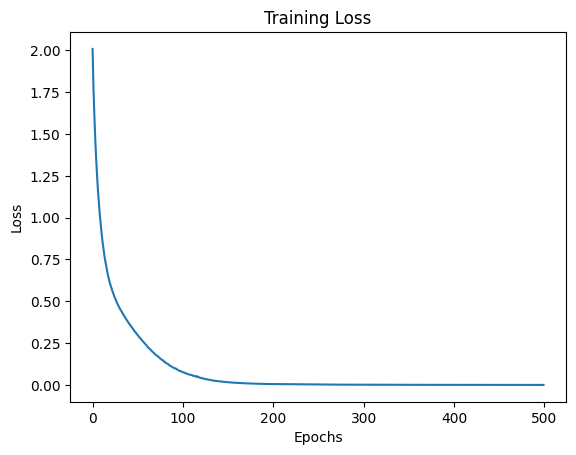

In [28]:
print("Number of parameters:", model.count_params())
print("Final training loss:", train_loss)
print("Final validation loss:", val_loss)

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()